Import data and preprocessing 

In [1]:
import pandas as pd, numpy as np
cancer_data = pd.read_csv('data.csv')

In [2]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer_data.drop(['id', 'Unnamed: 32'], axis=1, inplace = True)

In [4]:
import warnings
warnings.filterwarnings('ignore')
cancer_data.replace({'diagnosis': {'M':1, 'B':0}}, inplace=True)

In [5]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=cancer_data)

1. Single Table CTGANSynthesizer 

In [54]:
from sdv.single_table import CTGANSynthesizer
model1 = CTGANSynthesizer(metadata)
model1.fit(cancer_data)
Synthetic_data1 = model1.sample(num_rows=569)
Synthetic_data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,9.520,26.43,47.17,560.6,0.09913,0.12808,0.116546,0.000212,0.1627,...,25.749,19.94,94.92,1660.1,0.16761,0.79672,0.615599,0.291000,0.2229,0.06523
1,1,16.863,24.34,89.57,357.8,0.05504,0.02194,0.040079,0.003439,0.2221,...,30.481,27.01,251.20,1201.3,0.09005,0.19604,0.252883,0.013423,0.3422,0.08397
2,0,16.585,13.54,43.79,263.3,0.07674,0.02465,0.016390,0.000000,0.2527,...,13.606,23.65,96.61,1162.7,0.08802,0.86208,0.534737,0.146352,0.2120,0.09829
3,1,28.110,20.22,152.15,143.5,0.10552,0.02212,0.184711,0.000000,0.1860,...,30.668,27.22,152.03,527.8,0.18221,0.44338,1.212611,0.046906,0.3318,0.08932
4,0,12.290,20.52,64.39,153.0,0.10966,0.02850,0.246179,0.003152,0.2287,...,21.186,27.70,73.46,538.3,0.11194,0.12138,0.093184,0.192468,0.1565,0.06459


In [55]:
# diagnostic check and quality check

from sdv.evaluation.single_table import evaluate_quality, run_diagnostic

diagnostic_report = run_diagnostic(cancer_data, Synthetic_data1, metadata) 
quality_report = evaluate_quality(cancer_data, Synthetic_data1, metadata)

Generating report ...

(1/2) Evaluating Data Validity: |          | 0/31 [00:00<?, ?it/s]|

(1/2) Evaluating Data Validity: |██████████| 31/31 [00:00<00:00, 734.82it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 221.83it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:00<00:00, 499.54it/s]|
Column Shapes Score: 71.64%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [00:02<00:00, 184.95it/s]|
Column Pair Trends Score: 79.04%

Overall Score (Average): 75.34%



In [9]:
# from sdv.evaluation.single_table import get_column_plot

# fig = get_column_plot(real_data=cancer_data,synthetic_data=Synthetic_data,column_name='radius_mean', metadata=metadata)
# fig.show()

Intra-set similarity (within a dataset): Measures how similar the records within the same dataset are:

For the real dataset → detects redundancy or duplicates.

For the synthetic dataset → checks diversity (too-high similarity means overfitting).

Cross-set similarity (between real and synthetic): 

Measures how close synthetic records are to real ones:

High cross-similarity → potential data leakage (synthetic data is too close to real).

Low similarity → unrealistic or poorly learned distribution.

In [56]:
import numpy as np
import gower  # pip install gower

# Remove target column
X_real = cancer_data.drop(columns=['diagnosis'])
X_synth = Synthetic_data1.drop(columns=['diagnosis'])

# Compute Gower distance matrices
gower_real = 1 - gower.gower_matrix(X_real)    # similarity = 1 - distance
gower_synth = 1 - gower.gower_matrix(X_synth)
gower_cross = 1 - gower.gower_matrix(X_real, X_synth)  # cross-set similarity

# Upper triangle indices (exclude diagonal)
real_upper = gower_real[np.triu_indices_from(gower_real, k=1)]
synth_upper = gower_synth[np.triu_indices_from(gower_synth, k=1)]

# Max and average intra-set similarity
max_intra_real = np.max(real_upper)
avg_intra_real = np.mean(real_upper)

max_intra_synth = np.max(synth_upper)
avg_intra_synth = np.mean(synth_upper)

# Flatten the cross-set matrix
cross_flat = gower_cross.flatten()

max_cross = np.max(cross_flat)
avg_cross = np.mean(cross_flat)

print("Intra-set Similarity (Real):")
print(f"Max = {max_intra_real:.4f}, Avg = {avg_intra_real:.4f}\n")

print("Intra-set Similarity (Synthetic):")
print(f"Max = {max_intra_synth:.4f}, Avg = {avg_intra_synth:.4f}\n")

print("Cross-set Similarity (Real vs Synthetic):")
print(f"Max = {max_cross:.4f}, Avg = {avg_cross:.4f}")

Intra-set Similarity (Real):
Max = 0.9809, Avg = 0.8528

Intra-set Similarity (Synthetic):
Max = 0.9177, Avg = 0.7949

Cross-set Similarity (Real vs Synthetic):
Max = 0.9238, Avg = 0.8143


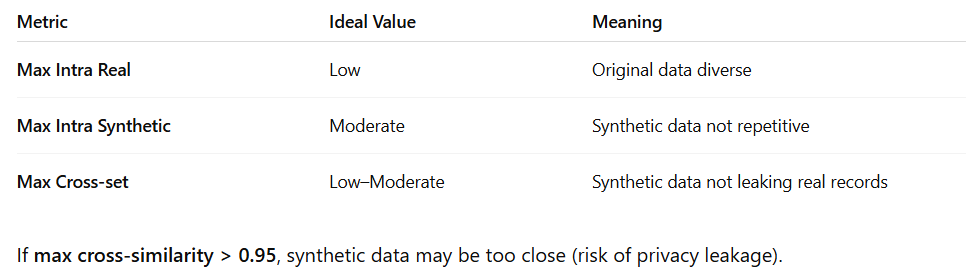

TSTR (Train on synthetic and test on real data)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Define real and synthetic datasets
real_data = cancer_data
synthetic_data = Synthetic_data1

# Split synthetic data (train/test)
X_synth = synthetic_data.drop(['diagnosis'], axis=1)
y_synth = synthetic_data['diagnosis']
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(
    X_synth, y_synth, test_size=0.2, random_state=42
)

# Split real data (train/test)
X_real = real_data.drop(['diagnosis'], axis=1)
y_real = real_data['diagnosis']
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_real, y_real, test_size=0.2, random_state=42
)

# Scale features using scaler fitted on synthetic training data
scaler = StandardScaler().fit(X_train_synth)
X_train_synth_scaled = scaler.transform(X_train_synth)
X_test_real_scaled = scaler.transform(X_test_real)  # scale real data with same scaler

# Train model on synthetic data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_synth_scaled, y_train_synth)

# Test model on real data
y_pred_real = model.predict(X_test_real_scaled)
y_pred_prob_real = model.predict_proba(X_test_real_scaled)[:, 1]  # probability for class 1

# Evaluate performance
acc = accuracy_score(y_test_real, y_pred_real)
f1 = f1_score(y_test_real, y_pred_real)
auc = roc_auc_score(y_test_real, y_pred_prob_real)

print("Train on Synthetic, Test on Real (TSTR):")
print(f"Accuracy = {acc:.3f}")
print(f"F1 Score = {f1:.3f}")
print(f"AUC = {auc:.3f}")

Train on Synthetic, Test on Real (TSTR):
Accuracy = 0.772
F1 Score = 0.683
AUC = 0.805


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

scaler = StandardScaler()
real_scaled = scaler.fit_transform(cancer_data.drop(columns=['diagnosis']))
synthetic_scaled = scaler.transform(Synthetic_data1.drop(columns=['diagnosis']))

# Cosine similarity
cross_sim = cosine_similarity(real_scaled, synthetic_scaled)
avg_sim = np.mean(cross_sim)
max_sim = np.max(cross_sim)

# MMD (using Gaussian kernel)
def gaussian_kernel(x, y, sigma=1.0):
    x_size = x.shape[0]
    y_size = y.shape[0]
    dim = x.shape[1]
    x_tile = np.tile(x, (y_size, 1))
    y_tile = np.repeat(y, x_size, axis=0)
    return np.exp(-np.sum((x_tile - y_tile)**2, axis=1) / (2 * dim * sigma**2)).reshape(y_size, x_size)

def compute_mmd(x, y, sigma=1.0):
    k_xx = np.mean(gaussian_kernel(x, x, sigma))
    k_yy = np.mean(gaussian_kernel(y, y, sigma))
    k_xy = np.mean(gaussian_kernel(x, y, sigma))
    return k_xx + k_yy - 2 * k_xy

mmd_score = compute_mmd(real_scaled, synthetic_scaled)

print(f"\n🧬 Sample-Level Similarity:")
print(f"Average cosine similarity: {avg_sim:.4f}")
print(f"Maximum cosine similarity: {max_sim:.4f}")
print(f"MMD score: {mmd_score:.4f}")



🧬 Sample-Level Similarity:
Average cosine similarity: -0.0034
Maximum cosine similarity: 0.7802
MMD score: 0.1987


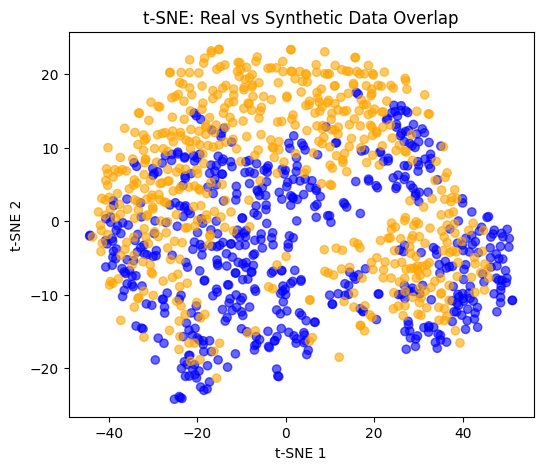

In [97]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
combined = np.vstack([real_scaled, synthetic_scaled])
tsne_result = tsne.fit_transform(combined)
labels = ['Real'] * len(real_scaled) + ['Synthetic'] * len(synthetic_scaled)

plt.figure(figsize=(6,5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
            c=['blue' if l == 'Real' else 'orange' for l in labels],
            alpha=0.6, label=None)
plt.title("t-SNE: Real vs Synthetic Data Overlap")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [ ]:
# Privacy (Nearest Neighbor Distance)

from sklearn.neighbors import NearestNeighbors
# Standardize using the same scaler
scaler = StandardScaler()
real_scaled = scaler.fit_transform(cancer_data.drop(columns=['diagnosis']))
synthetic_scaled = scaler.transform(Synthetic_data1.drop(columns=['diagnosis']))

# Compute Nearest Neighbor Distance
nn = NearestNeighbors(n_neighbors=1).fit(real_scaled)
distances, _ = nn.kneighbors(synthetic_scaled)
avg_nn_dist = np.mean(distances)

print("Privacy Check:")
print(f"Average Nearest Neighbor Distance (Synthetic → Real): {avg_nn_dist:.4f}")

Privacy Check:
Average Nearest Neighbor Distance (Synthetic → Real): 6.4922


2. CopulaGAN

CopulaGAN is a GAN-based synthetic data generator for tabular data that uses copulas to better model dependencies between features.

GAN component: Learns the overall data distribution and generates synthetic samples.

Copula component: Models dependence structure between columns, especially useful for non-Gaussian or skewed distributions.

In [71]:
from sdv.single_table import CopulaGANSynthesizer
model2 = CopulaGANSynthesizer(metadata)
model2.fit(cancer_data)
Synthetic_data2 = model2.sample(num_rows=569)
Synthetic_data2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,12.667,14.48,128.64,2501.0,0.09475,0.10650,0.140228,0.022305,0.2188,...,17.725,30.37,251.20,1195.7,0.17225,1.05800,0.639987,0.110195,0.3288,0.05867
1,1,11.084,22.27,81.91,1659.4,0.10691,0.04431,0.005481,0.044080,0.1464,...,17.389,41.86,251.20,1145.7,0.16008,0.28833,0.019865,0.216991,0.2528,0.06057
2,0,21.265,15.18,98.26,2249.8,0.08703,0.06115,0.031989,0.155368,0.1467,...,11.606,32.74,87.22,905.3,0.16536,0.17679,0.269761,0.252599,0.2463,0.06473
3,1,11.387,16.68,93.30,753.8,0.10622,0.03387,0.147918,0.008570,0.1285,...,26.380,27.68,76.73,1121.9,0.11171,0.47720,0.000000,0.291000,0.4170,0.06615
4,0,7.568,11.00,93.73,2501.0,0.10826,0.31328,0.017158,0.000122,0.2046,...,21.643,32.64,100.49,1245.8,0.14650,0.30926,0.057576,0.291000,0.2607,0.07212


In [72]:
# diagnostic check and quality check

from sdv.evaluation.single_table import evaluate_quality, run_diagnostic

diagnostic_report = run_diagnostic(cancer_data, Synthetic_data2, metadata) 
quality_report = evaluate_quality(cancer_data, Synthetic_data2, metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 31/31 [00:00<00:00, 985.23it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 784.28it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:00<00:00, 629.38it/s]|
Column Shapes Score: 70.72%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [00:02<00:00, 183.74it/s]|
Column Pair Trends Score: 79.04%

Overall Score (Average): 74.88%



In [75]:
real_data = cancer_data
synthetic_data = Synthetic_data2

# Remove target column
X_real = real_data.drop(columns=['diagnosis'])
X_synth = synthetic_data.drop(columns=['diagnosis'])

# Compute Gower distance matrices
gower_real = 1 - gower.gower_matrix(X_real)    # similarity = 1 - distance
gower_synth = 1 - gower.gower_matrix(X_synth)
gower_cross = 1 - gower.gower_matrix(X_real, X_synth)  # cross-set similarity


# Upper triangle indices (exclude diagonal)

real_upper = gower_real[np.triu_indices_from(gower_real, k=1)]
synth_upper = gower_synth[np.triu_indices_from(gower_synth, k=1)]

# Max and average intra-set similarity

max_intra_real = np.max(real_upper)
avg_intra_real = np.mean(real_upper)

max_intra_synth = np.max(synth_upper)
avg_intra_synth = np.mean(synth_upper)

# Flatten the cross-set matrix

cross_flat = gower_cross.flatten()

max_cross = np.max(cross_flat)
avg_cross = np.mean(cross_flat)


print("Intra-set Similarity (Real):")
print(f"Max = {max_intra_real:.4f}, Avg = {avg_intra_real:.4f}\n")

print("Intra-set Similarity (Synthetic):")
print(f"Max = {max_intra_synth:.4f}, Avg = {avg_intra_synth:.4f}\n")

print("Cross-set Similarity (Real vs Synthetic):")
print(f"Max = {max_cross:.4f}, Avg = {avg_cross:.4f}")

Intra-set Similarity (Real):
Max = 0.9809, Avg = 0.8528

Intra-set Similarity (Synthetic):
Max = 0.9353, Avg = 0.7814

Cross-set Similarity (Real vs Synthetic):
Max = 0.9193, Avg = 0.7974


In [98]:
from sklearn.metrics.pairwise import cosine_similarity

scaler = StandardScaler()
real_scaled = scaler.fit_transform(cancer_data.drop(columns=['diagnosis']))
synthetic_scaled = scaler.transform(Synthetic_data2.drop(columns=['diagnosis']))

# Cosine similarity
cross_sim = cosine_similarity(real_scaled, synthetic_scaled)
avg_sim = np.mean(cross_sim)
max_sim = np.max(cross_sim)

# MMD (using Gaussian kernel)
def gaussian_kernel(x, y, sigma=1.0):
    x_size = x.shape[0]
    y_size = y.shape[0]
    dim = x.shape[1]
    x_tile = np.tile(x, (y_size, 1))
    y_tile = np.repeat(y, x_size, axis=0)
    return np.exp(-np.sum((x_tile - y_tile)**2, axis=1) / (2 * dim * sigma**2)).reshape(y_size, x_size)

def compute_mmd(x, y, sigma=1.0):
    k_xx = np.mean(gaussian_kernel(x, x, sigma))
    k_yy = np.mean(gaussian_kernel(y, y, sigma))
    k_xy = np.mean(gaussian_kernel(x, y, sigma))
    return k_xx + k_yy - 2 * k_xy

mmd_score = compute_mmd(real_scaled, synthetic_scaled)

print(f"\n🧬 Sample-Level Similarity:")
print(f"Average cosine similarity: {avg_sim:.4f}")
print(f"Maximum cosine similarity: {max_sim:.4f}")
print(f"MMD score: {mmd_score:.4f}")


🧬 Sample-Level Similarity:
Average cosine similarity: -0.0348
Maximum cosine similarity: 0.7944
MMD score: 0.2714


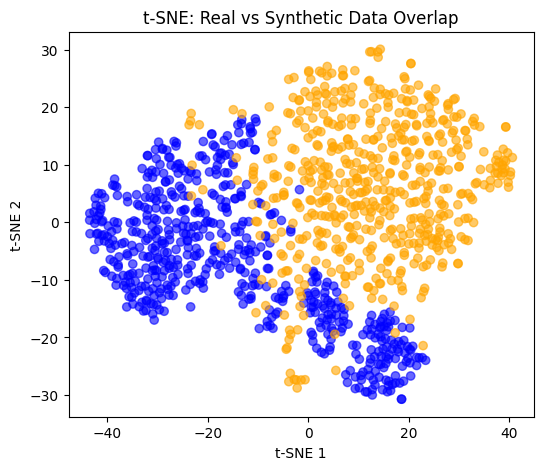

In [99]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
combined = np.vstack([real_scaled, synthetic_scaled])
tsne_result = tsne.fit_transform(combined)
labels = ['Real'] * len(real_scaled) + ['Synthetic'] * len(synthetic_scaled)

plt.figure(figsize=(6,5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
            c=['blue' if l == 'Real' else 'orange' for l in labels],
            alpha=0.6, label=None)
plt.title("t-SNE: Real vs Synthetic Data Overlap")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# # Define real and synthetic datasets
real_data = cancer_data
synthetic_data = Synthetic_data2

# Split synthetic data (train/test)
X_synth = synthetic_data.drop(['diagnosis'], axis=1)
y_synth = synthetic_data['diagnosis']
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(
    X_synth, y_synth, test_size=0.2, random_state=42
)

# Split real data (train/test)
X_real = cancer_data.drop(['diagnosis'], axis=1)
y_real =  cancer_data['diagnosis']
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_real, y_real, test_size=0.2, random_state=42
)

# Scale features using scaler fitted on synthetic training data
scaler = StandardScaler().fit(X_train_synth)
X_train_synth_scaled = scaler.transform(X_train_synth)
X_test_real_scaled = scaler.transform(X_test_real)  # scale real data with same scaler

# Train model on synthetic data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_synth_scaled, y_train_synth)

# Test model on real data
y_pred_real = model.predict(X_test_real_scaled)
y_pred_prob_real = model.predict_proba(X_test_real_scaled)[:, 1]  # probability for class 1

# Evaluate performance
acc = accuracy_score(y_test_real, y_pred_real)
f1 = f1_score(y_test_real, y_pred_real)
auc = roc_auc_score(y_test_real, y_pred_prob_real)

print("Train on Synthetic, Test on Real (TSTR):")
print(f"Accuracy = {acc:.3f}")
print(f"F1 Score = {f1:.3f}")
print(f"AUC = {auc:.3f}")

Train on Synthetic, Test on Real (TSTR):
Accuracy = 0.386
F1 Score = 0.205
AUC = 0.282


In [ ]:
# Privacy (Nearest Neighbor Distance)

from sklearn.neighbors import NearestNeighbors
# Standardize using the same scaler
scaler = StandardScaler()
real_scaled = scaler.fit_transform(cancer_data.drop(columns=['diagnosis']))
synthetic_scaled = scaler.transform(Synthetic_data2.drop(columns=['diagnosis']))

# Compute Nearest Neighbor Distance
nn = NearestNeighbors(n_neighbors=1).fit(real_scaled)
distances, _ = nn.kneighbors(synthetic_scaled)
avg_nn_dist = np.mean(distances)

print("Privacy Check:")
print(f"Average Nearest Neighbor Distance (Synthetic → Real): {avg_nn_dist:.4f}")

Privacy Check:
Average Nearest Neighbor Distance (Synthetic → Real): 7.9234


3. Gaussiancopula

The **Gaussian Copula** is a statistical model used to generate synthetic data by capturing the dependencies among variables while allowing each feature to maintain its own marginal distribution. It works by transforming the original data into a multivariate normal space, modeling the correlations between features using a Gaussian distribution, and then mapping the data back to the original feature scales. This approach preserves both linear and certain nonlinear relationships between variables, making it particularly effective for tabular datasets like the Breast Cancer Wisconsin dataset. By leveraging the Gaussian Copula, synthetic data can closely approximate the joint distribution of real data while maintaining flexibility, interpretability, and privacy protection.


In [80]:
from sdv.single_table import GaussianCopulaSynthesizer
model3 = GaussianCopulaSynthesizer(metadata)
model3.fit(cancer_data)
Synthetic_data3 = model3.sample(num_rows=569)
Synthetic_data3

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,13.063,18.07,82.27,534.0,0.07895,0.04268,0.022739,0.019326,0.1457,...,13.945,25.23,89.44,596.3,0.12997,0.09224,0.102124,0.081370,0.2130,0.07473
1,0,12.903,16.68,83.22,511.3,0.11140,0.13874,0.046816,0.024106,0.2176,...,14.824,25.43,95.36,703.1,0.15198,0.39831,0.219331,0.114531,0.3815,0.10816
2,0,12.144,20.38,79.67,440.2,0.10578,0.15952,0.087810,0.037386,0.2042,...,14.063,31.96,92.47,597.6,0.14872,0.43640,0.252768,0.146417,0.4024,0.10780
3,1,11.171,20.74,71.76,381.8,0.10040,0.08525,0.028174,0.021851,0.1560,...,11.366,27.09,72.87,399.3,0.13801,0.13753,0.049883,0.047761,0.2118,0.07572
4,1,28.110,25.93,188.50,2425.7,0.08694,0.08802,0.138158,0.094686,0.1234,...,36.040,36.42,251.20,3947.7,0.14332,0.26353,0.408867,0.214969,0.1913,0.07765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,17.884,26.71,117.66,1033.4,0.08843,0.09083,0.066747,0.046638,0.1661,...,23.501,33.90,159.18,1672.0,0.13427,0.27882,0.261552,0.140711,0.2765,0.08958
565,1,17.022,25.54,111.91,915.0,0.08060,0.12529,0.130752,0.058308,0.1756,...,21.861,31.27,149.63,1510.2,0.12773,0.41824,0.386627,0.168946,0.2541,0.07966
566,0,19.781,21.81,132.53,1237.1,0.10339,0.18127,0.170942,0.094235,0.1992,...,23.832,27.00,161.80,1855.1,0.13689,0.39224,0.434629,0.188011,0.2179,0.08208
567,0,24.197,17.20,155.33,1675.6,0.09049,0.06332,0.125267,0.108422,0.1520,...,30.063,24.06,192.59,2484.6,0.13732,0.22287,0.457658,0.206411,0.2415,0.07381


In [81]:
diagnostic_report = run_diagnostic(real_data=cancer_data, synthetic_data=Synthetic_data3, metadata=metadata)
quality_report = evaluate_quality(real_data=cancer_data, synthetic_data=Synthetic_data3, metadata=metadata)

Generating report ...

|          | 0/31 [00:00<?, ?it/s]|

(1/2) Evaluating Data Validity: |██████████| 31/31 [00:00<00:00, 447.26it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 222.82it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:00<00:00, 451.38it/s]|
Column Shapes Score: 92.38%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [00:02<00:00, 188.83it/s]|
Column Pair Trends Score: 95.2%

Overall Score (Average): 93.79%



In [82]:
# Remove target column
X_real = cancer_data.drop(columns=['diagnosis'])
X_synth = Synthetic_data3.drop(columns=['diagnosis'])

# Compute Gower distance matrices
gower_real = 1 - gower.gower_matrix(X_real)    # similarity = 1 - distance
gower_synth = 1 - gower.gower_matrix(X_synth)
gower_cross = 1 - gower.gower_matrix(X_real, X_synth)  # cross-set similarity


# Upper triangle indices (exclude diagonal)

real_upper = gower_real[np.triu_indices_from(gower_real, k=1)]
synth_upper = gower_synth[np.triu_indices_from(gower_synth, k=1)]

# Max and average intra-set similarity

max_intra_real = np.max(real_upper)
avg_intra_real = np.mean(real_upper)

max_intra_synth = np.max(synth_upper)
avg_intra_synth = np.mean(synth_upper)

# Flatten the cross-set matrix

cross_flat = gower_cross.flatten()

max_cross = np.max(cross_flat)
avg_cross = np.mean(cross_flat)


print("Intra-set Similarity (Real):")
print(f"Max = {max_intra_real:.4f}, Avg = {avg_intra_real:.4f}\n")

print("Intra-set Similarity (Synthetic):")
print(f"Max = {max_intra_synth:.4f}, Avg = {avg_intra_synth:.4f}\n")

print("Cross-set Similarity (Real vs Synthetic):")
print(f"Max = {max_cross:.4f}, Avg = {avg_cross:.4f}")

Intra-set Similarity (Real):
Max = 0.9809, Avg = 0.8528

Intra-set Similarity (Synthetic):
Max = 0.9731, Avg = 0.8109

Cross-set Similarity (Real vs Synthetic):
Max = 0.9772, Avg = 0.8486


In [100]:
from sklearn.metrics.pairwise import cosine_similarity

scaler = StandardScaler()
real_scaled = scaler.fit_transform(cancer_data.drop(columns=['diagnosis']))
synthetic_scaled = scaler.transform(Synthetic_data3.drop(columns=['diagnosis']))

# Cosine similarity
cross_sim = cosine_similarity(real_scaled, synthetic_scaled)
avg_sim = np.mean(cross_sim)
max_sim = np.max(cross_sim)

# MMD (using Gaussian kernel)
def gaussian_kernel(x, y, sigma=1.0):
    x_size = x.shape[0]
    y_size = y.shape[0]
    dim = x.shape[1]
    x_tile = np.tile(x, (y_size, 1))
    y_tile = np.repeat(y, x_size, axis=0)
    return np.exp(-np.sum((x_tile - y_tile)**2, axis=1) / (2 * dim * sigma**2)).reshape(y_size, x_size)

def compute_mmd(x, y, sigma=1.0):
    k_xx = np.mean(gaussian_kernel(x, x, sigma))
    k_yy = np.mean(gaussian_kernel(y, y, sigma))
    k_xy = np.mean(gaussian_kernel(x, y, sigma))
    return k_xx + k_yy - 2 * k_xy

mmd_score = compute_mmd(real_scaled, synthetic_scaled)

print(f"\n🧬 Sample-Level Similarity:")
print(f"Average cosine similarity: {avg_sim:.4f}")
print(f"Maximum cosine similarity: {max_sim:.4f}")
print(f"MMD score: {mmd_score:.4f}")



🧬 Sample-Level Similarity:
Average cosine similarity: 0.0370
Maximum cosine similarity: 0.9494
MMD score: 0.0152


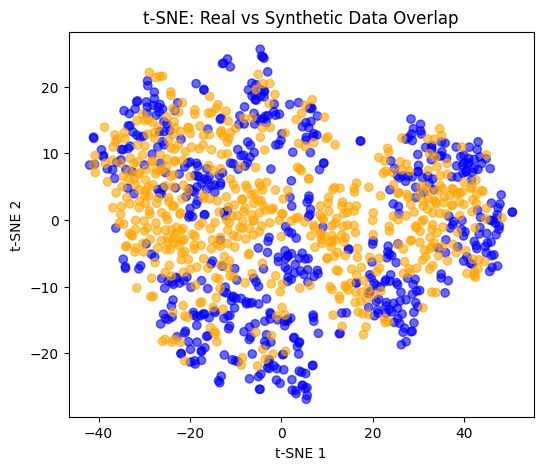

In [101]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
combined = np.vstack([real_scaled, synthetic_scaled])
tsne_result = tsne.fit_transform(combined)
labels = ['Real'] * len(real_scaled) + ['Synthetic'] * len(synthetic_scaled)

plt.figure(figsize=(6,5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
            c=['blue' if l == 'Real' else 'orange' for l in labels],
            alpha=0.6, label=None)
plt.title("t-SNE: Real vs Synthetic Data Overlap")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Define real and synthetic datasets
real_data = cancer_data
synthetic_data = Synthetic_data3

# Split synthetic data (train/test)
X_synth = synthetic_data.drop(['diagnosis'], axis=1)
y_synth = synthetic_data['diagnosis']
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(
    X_synth, y_synth, test_size=0.2, random_state=42
)

# Split real data (train/test)
X_real = real_data.drop(['diagnosis'], axis=1)
y_real = real_data['diagnosis']
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_real, y_real, test_size=0.2, random_state=42
)

# Scale features using scaler fitted on synthetic training data
scaler = StandardScaler().fit(X_train_synth)
X_train_synth_scaled = scaler.transform(X_train_synth)
X_test_real_scaled = scaler.transform(X_test_real)  # scale real data with same scaler

# Train model on synthetic data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_synth_scaled, y_train_synth)

# Test model on real data
y_pred_real = model.predict(X_test_real_scaled)
y_pred_prob_real = model.predict_proba(X_test_real_scaled)[:, 1]  # probability for class 1

# Evaluate performance
acc = accuracy_score(y_test_real, y_pred_real)
f1 = f1_score(y_test_real, y_pred_real)
auc = roc_auc_score(y_test_real, y_pred_prob_real)

print("Train on Synthetic, Test on Real (TSTR):")
print(f"Accuracy = {acc:.3f}")
print(f"F1 Score = {f1:.3f}")
print(f"AUC = {auc:.3f}")

Train on Synthetic, Test on Real (TSTR):
Accuracy = 0.895
F1 Score = 0.838
AUC = 0.965


In [84]:
# Privacy (Nearest Neighbor Distance)

from sklearn.neighbors import NearestNeighbors

# Standardize using the same scaler
scaler = StandardScaler()
real_scaled = scaler.fit_transform(cancer_data.drop(columns=['diagnosis']))
synthetic_scaled = scaler.transform(Synthetic_data3.drop(columns=['diagnosis']))

# Compute Nearest Neighbor Distance
nn = NearestNeighbors(n_neighbors=1).fit(real_scaled)
distances, _ = nn.kneighbors(synthetic_scaled)
avg_nn_dist = np.mean(distances)

print("Privacy Check:")
print(f"Average Nearest Neighbor Distance (Synthetic → Real): {avg_nn_dist:.4f}")

Privacy Check:
Average Nearest Neighbor Distance (Synthetic → Real): 2.7038


4. TVAE Synthesizer

The **TVAE (Tabular Variational Autoencoder)** synthesizer is a deep learning–based generative model designed specifically for producing high-quality synthetic **tabular data**. It uses a **variational autoencoder (VAE)** architecture that encodes real data into a lower-dimensional latent space and then decodes samples from that space back into realistic synthetic records. Unlike traditional VAEs, TVAE handles a mix of **continuous and categorical features** by modeling them with appropriate likelihood functions, making it well-suited for datasets like the **Breast Cancer Wisconsin dataset**. During training, TVAE learns both feature distributions and inter-feature dependencies, allowing it to generate synthetic data that closely matches the statistical properties and predictive relationships of the real data while reducing privacy risks and supporting downstream machine-learning tasks.

In [88]:
from sdv.single_table import TVAESynthesizer
model4 = TVAESynthesizer(metadata)
model4.fit(cancer_data)
Synthetic_data4 = model4.sample(num_rows=569)
Synthetic_data4

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,11.250,13.63,73.58,321.0,0.10531,0.17754,0.172067,0.086982,0.1591,...,14.787,31.67,97.22,709.3,0.13914,0.36064,0.846049,0.210394,0.3111,0.10531
1,0,12.092,16.54,65.50,426.1,0.07635,0.06120,0.014775,0.000000,0.1480,...,10.599,21.57,79.61,492.5,0.10823,0.05089,0.043037,0.030866,0.3160,0.07361
2,0,12.425,20.43,78.54,390.2,0.09598,0.03320,0.037417,0.017565,0.1617,...,12.423,22.53,98.51,650.9,0.09773,0.13290,0.127945,0.061849,0.2596,0.06691
3,0,11.820,11.97,66.82,575.7,0.08962,0.05883,0.010043,0.011556,0.1669,...,14.447,20.43,86.27,536.9,0.08809,0.03422,0.062381,0.018723,0.3058,0.07500
4,1,10.300,17.96,80.13,431.1,0.12338,0.12282,0.184465,0.082399,0.1701,...,10.179,34.22,93.32,768.9,0.18878,0.44257,0.276137,0.176255,0.3074,0.10437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,13.305,18.38,70.79,378.7,0.09977,0.12023,0.103705,0.102957,0.1641,...,14.083,32.72,80.21,473.9,0.10758,0.16236,0.157959,0.053839,0.2148,0.07620
565,1,11.818,18.08,126.03,614.2,0.10095,0.11818,0.037212,0.064803,0.1951,...,24.191,26.57,85.92,1595.2,0.11755,0.25709,0.358439,0.197407,0.2499,0.07114
566,0,11.681,19.74,82.93,428.5,0.07874,0.02478,0.000000,0.018024,0.1522,...,15.615,18.08,105.38,623.1,0.11504,0.11675,0.000000,0.084568,0.2564,0.06581
567,1,13.575,16.84,90.49,579.2,0.10739,0.09966,0.019737,0.069724,0.1849,...,24.794,28.43,157.38,1770.9,0.14033,0.39549,0.412811,0.182227,0.3259,0.08636


In [89]:
diagnostic_report = run_diagnostic(cancer_data, synthetic_data=Synthetic_data4, metadata=metadata)
quality_report = evaluate_quality(real_data=cancer_data, synthetic_data=Synthetic_data4, metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 31/31 [00:00<00:00, 516.08it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 104.72it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:00<00:00, 573.66it/s]|
Column Shapes Score: 88.16%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [00:02<00:00, 175.35it/s]|
Column Pair Trends Score: 91.92%

Overall Score (Average): 90.04%



In [ ]:
# Remove target column
X_real = cancer_data.drop(columns=['diagnosis'])
X_synth = Synthetic_data4.drop(columns=['diagnosis'])

# Compute Gower distance matrices
gower_real = 1 - gower.gower_matrix(X_real)    # similarity = 1 - distance
gower_synth = 1 - gower.gower_matrix(X_synth)
gower_cross = 1 - gower.gower_matrix(X_real, X_synth)  # cross-set similarity


# Upper triangle indices (exclude diagonal)

real_upper = gower_real[np.triu_indices_from(gower_real, k=1)]
synth_upper = gower_synth[np.triu_indices_from(gower_synth, k=1)]

# Max and average intra-set similarity

max_intra_real = np.max(real_upper)
avg_intra_real = np.mean(real_upper)

max_intra_synth = np.max(synth_upper)
avg_intra_synth = np.mean(synth_upper)

# Flatten the cross-set matrix

cross_flat = gower_cross.flatten()

max_cross = np.max(cross_flat)
avg_cross = np.mean(cross_flat)


print("Intra-set Similarity (Real):")
print(f"Max = {max_intra_real:.4f}, Avg = {avg_intra_real:.4f}\n")

print("Intra-set Similarity (Synthetic):")
print(f"Max = {max_intra_synth:.4f}, Avg = {avg_intra_synth:.4f}\n")

print("Cross-set Similarity (Real vs Synthetic):")
print(f"Max = {max_cross:.4f}, Avg = {avg_cross:.4f}")

Intra-set Similarity (Real):
Max = 0.9809, Avg = 0.8528

Intra-set Similarity (Synthetic):
Max = 0.9601, Avg = 0.8172

Cross-set Similarity (Real vs Synthetic):
Max = 0.9708, Avg = 0.8569


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

scaler = StandardScaler()
real_scaled = scaler.fit_transform(cancer_data.drop(columns=['diagnosis']))
synthetic_scaled = scaler.transform(Synthetic_data4.drop(columns=['diagnosis']))

# Cosine similarity
cross_sim = cosine_similarity(real_scaled, synthetic_scaled)
avg_sim = np.mean(cross_sim)
max_sim = np.max(cross_sim)

# MMD (using Gaussian kernel)
def gaussian_kernel(x, y, sigma=1.0):
    x_size = x.shape[0]
    y_size = y.shape[0]
    dim = x.shape[1]
    x_tile = np.tile(x, (y_size, 1))
    y_tile = np.repeat(y, x_size, axis=0)
    return np.exp(-np.sum((x_tile - y_tile)**2, axis=1) / (2 * dim * sigma**2)).reshape(y_size, x_size)

def compute_mmd(x, y, sigma=1.0):
    k_xx = np.mean(gaussian_kernel(x, x, sigma))
    k_yy = np.mean(gaussian_kernel(y, y, sigma))
    k_xy = np.mean(gaussian_kernel(x, y, sigma))
    return k_xx + k_yy - 2 * k_xy

mmd_score = compute_mmd(real_scaled, synthetic_scaled)

print(f"\n🧬 Sample-Level Similarity:")
print(f"Average cosine similarity: {avg_sim:.4f}")
print(f"Maximum cosine similarity: {max_sim:.4f}")
print(f"MMD score: {mmd_score:.4f}")


🧬 Sample-Level Similarity:
Average cosine similarity: 0.0363
Maximum cosine similarity: 0.9555
MMD score: 0.0194


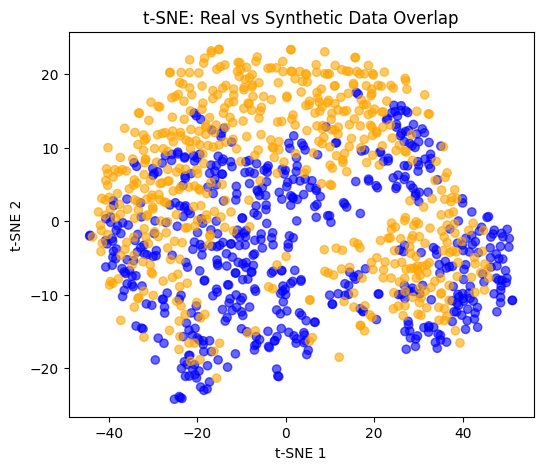

In [103]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
combined = np.vstack([real_scaled, synthetic_scaled])
tsne_result = tsne.fit_transform(combined)
labels = ['Real'] * len(real_scaled) + ['Synthetic'] * len(synthetic_scaled)

plt.figure(figsize=(6,5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
            c=['blue' if l == 'Real' else 'orange' for l in labels],
            alpha=0.6, label=None)
plt.title("t-SNE: Real vs Synthetic Data Overlap")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Define real and synthetic datasets
real_data = cancer_data
synthetic_data = Synthetic_data4

# Split synthetic data (train/test)
X_synth = synthetic_data.drop(['diagnosis'], axis=1)
y_synth = synthetic_data['diagnosis']
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(
    X_synth, y_synth, test_size=0.2, random_state=42
)

# Split real data (train/test)
X_real = real_data.drop(['diagnosis'], axis=1)
y_real = real_data['diagnosis']
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_real, y_real, test_size=0.2, random_state=42
)

# Scale features using scaler fitted on synthetic training data
scaler = StandardScaler().fit(X_train_synth)
X_train_synth_scaled = scaler.transform(X_train_synth)
X_test_real_scaled = scaler.transform(X_test_real)  # scale real data with same scaler

# Train model on synthetic data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_synth_scaled, y_train_synth)

# Test model on real data
y_pred_real = model.predict(X_test_real_scaled)
y_pred_prob_real = model.predict_proba(X_test_real_scaled)[:, 1]  # probability for class 1

# Evaluate performance
acc = accuracy_score(y_test_real, y_pred_real)
f1 = f1_score(y_test_real, y_pred_real)
auc = roc_auc_score(y_test_real, y_pred_prob_real)

print("Train on Synthetic, Test on Real (TSTR):")
print(f"Accuracy = {acc:.3f}")
print(f"F1 Score = {f1:.3f}")
print(f"AUC = {auc:.3f}")

Train on Synthetic, Test on Real (TSTR):
Accuracy = 0.974
F1 Score = 0.966
AUC = 0.998


In [91]:
# Privacy (Nearest Neighbor Distance)

from sklearn.neighbors import NearestNeighbors

# Standardize using the same scaler
scaler = StandardScaler()
real_scaled = scaler.fit_transform(cancer_data.drop(columns=['diagnosis']))
synthetic_scaled = scaler.transform(Synthetic_data4.drop(columns=['diagnosis']))

# Compute Nearest Neighbor Distance
nn = NearestNeighbors(n_neighbors=1).fit(real_scaled)
distances, _ = nn.kneighbors(synthetic_scaled)
avg_nn_dist = np.mean(distances)

print("Privacy Check:")
print(f"Average Nearest Neighbor Distance (Synthetic → Real): {avg_nn_dist:.4f}")

Privacy Check:
Average Nearest Neighbor Distance (Synthetic → Real): 2.7960
